In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/bitcoin_dataset.csv")
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,0.0,0.0,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,0.0,0.0,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,0.0,0.0,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,0.0,0.0,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,0.0,0.0,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data['btc_market_price'][1023]

13.6888

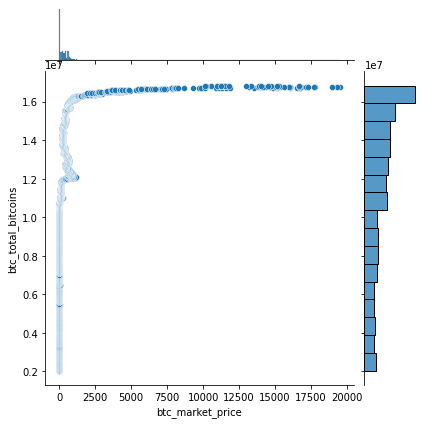

In [4]:
sns.jointplot(x=data.btc_market_price,y=data.btc_total_bitcoins,data=data)

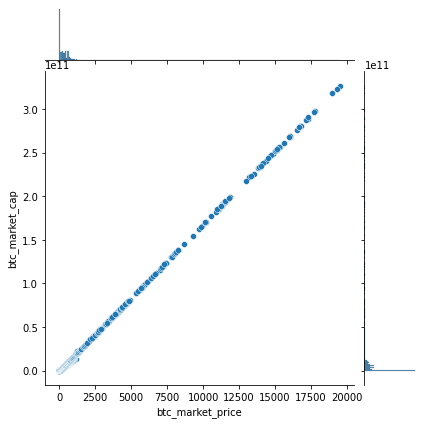

In [5]:
sns.jointplot(x=data.btc_market_price,y=data.btc_market_cap,data=data)

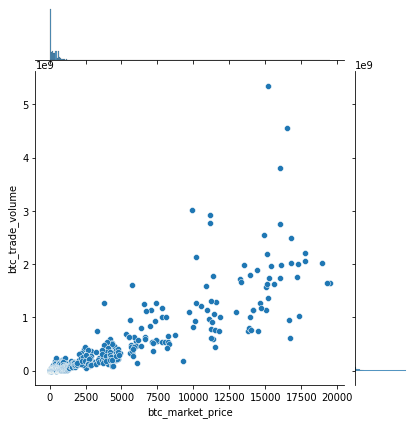

In [6]:
sns.jointplot(x=data.btc_market_price,y=data.btc_trade_volume,data=data)

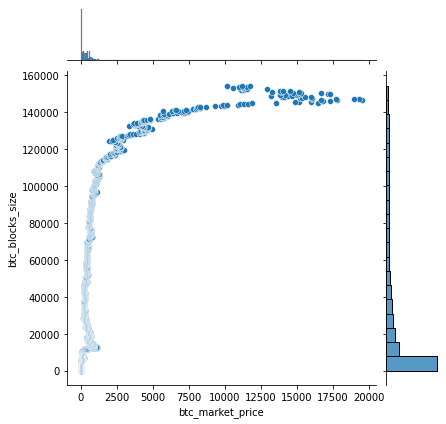

In [7]:
sns.jointplot(x=data.btc_market_price,y=data.btc_blocks_size,data=data)

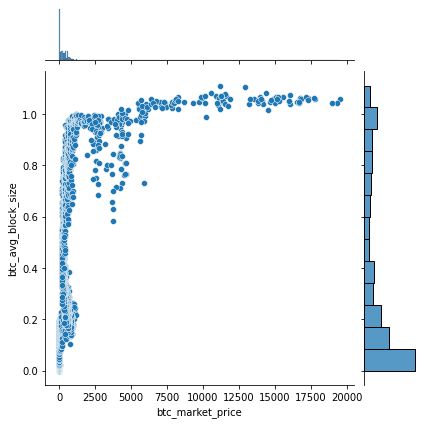

In [8]:
sns.jointplot(x=data.btc_market_price,y=data.btc_avg_block_size,data=data)

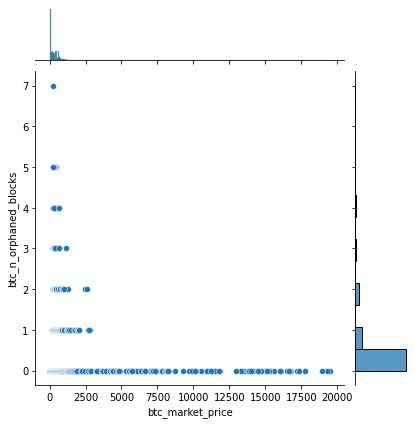

In [9]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_orphaned_blocks,data=data)

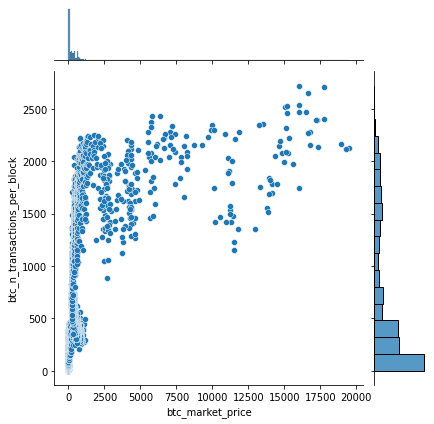

In [10]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_transactions_per_block,data=data)

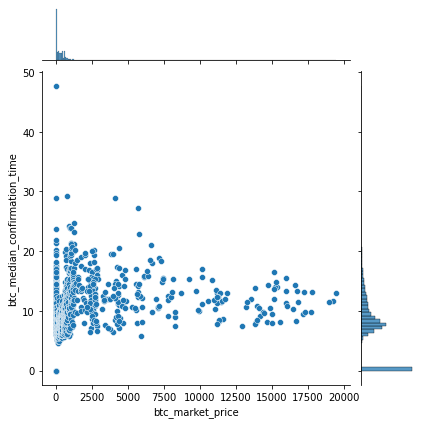

In [11]:
sns.jointplot(x=data.btc_market_price,y=data.btc_median_confirmation_time,data=data)

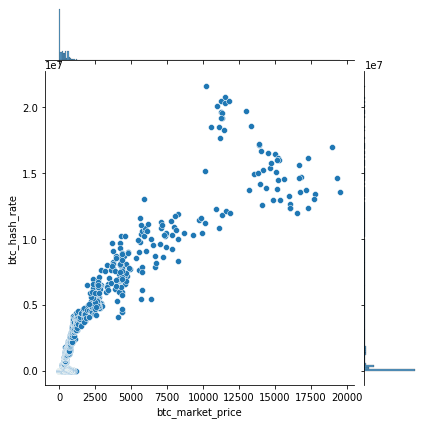

In [12]:
sns.jointplot(x=data.btc_market_price,y=data.btc_hash_rate,data=data)

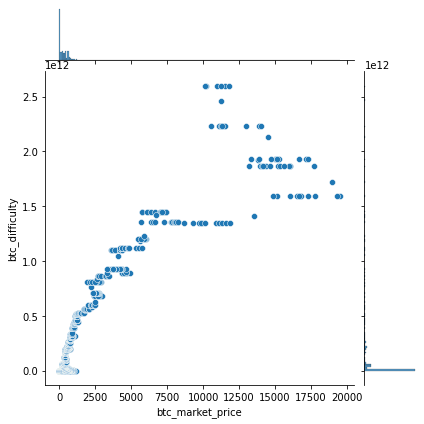

In [13]:
sns.jointplot(x=data.btc_market_price,y=data.btc_difficulty,data=data)

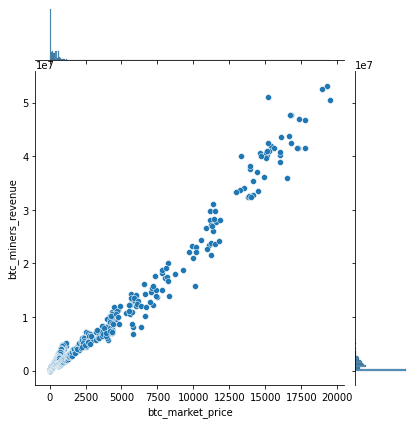

In [14]:
sns.jointplot(x=data.btc_market_price,y=data.btc_miners_revenue,data=data)

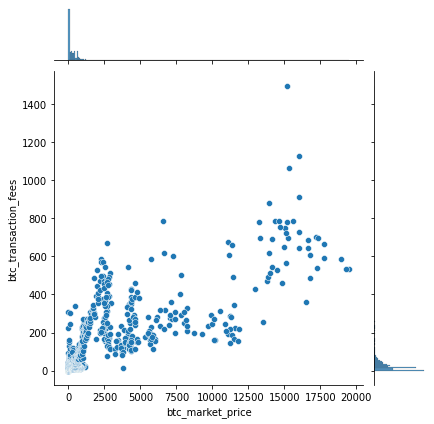

In [15]:
sns.jointplot(x=data.btc_market_price,y=data.btc_transaction_fees,data=data)

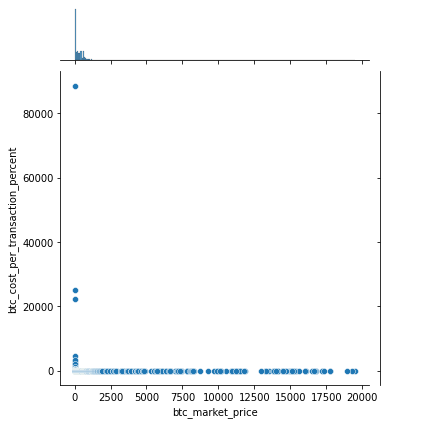

In [16]:
sns.jointplot(x=data.btc_market_price,y=data.btc_cost_per_transaction_percent,data=data)

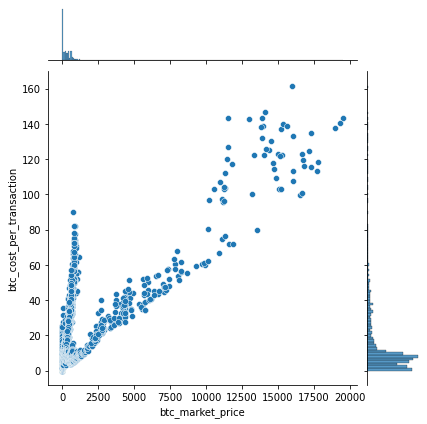

In [17]:
sns.jointplot(x=data.btc_market_price,y=data.btc_cost_per_transaction,data=data)


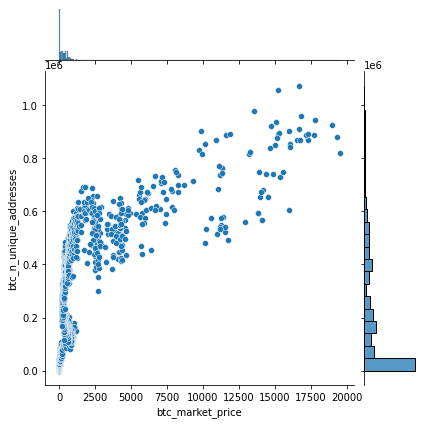

In [18]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_unique_addresses,data=data)


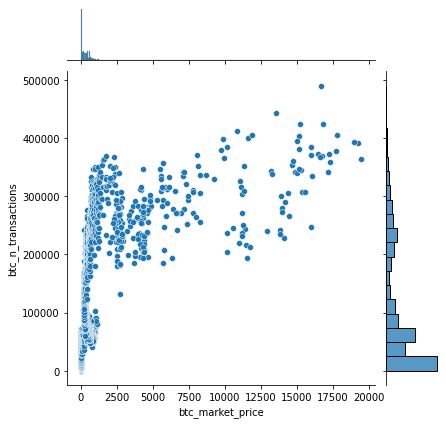

In [19]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_transactions,data=data)


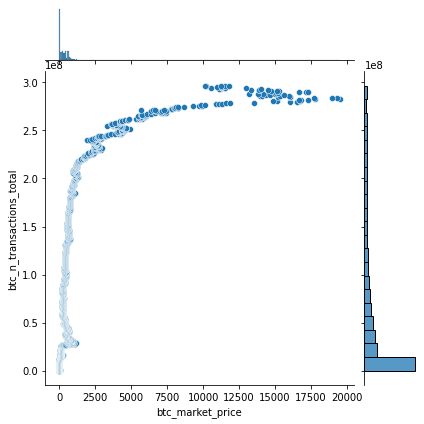

In [20]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_transactions_total,data=data)


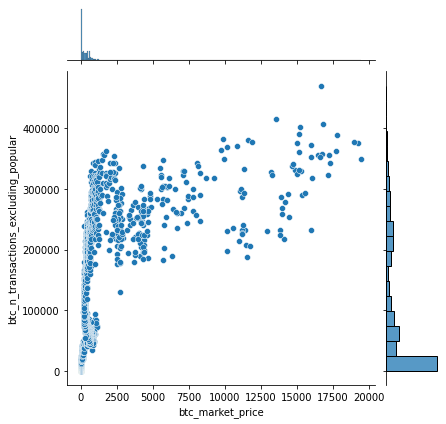

In [21]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_transactions_excluding_popular	,data=data)


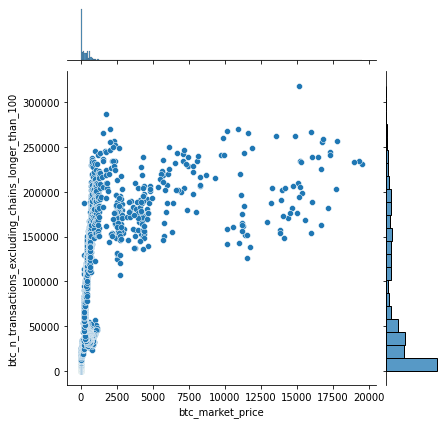

In [22]:
sns.jointplot(x=data.btc_market_price,y=data.btc_n_transactions_excluding_chains_longer_than_100	,data=data)


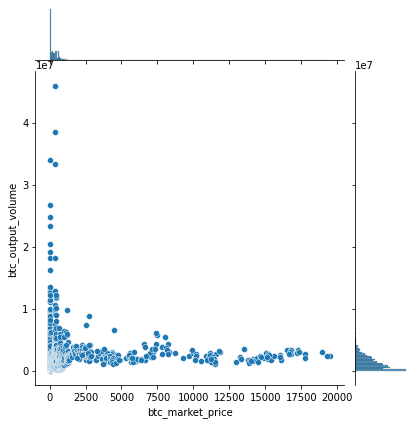

In [23]:
sns.jointplot(x=data.btc_market_price,y=data.btc_output_volume,data=data)


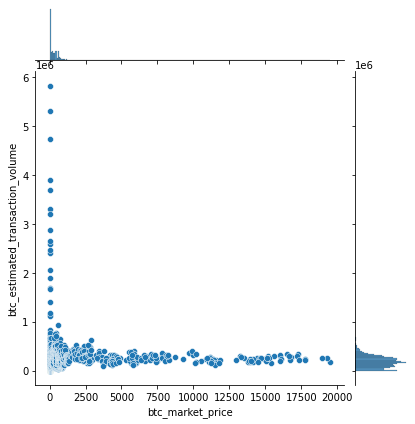

In [24]:
sns.jointplot(x=data.btc_market_price,y=data.btc_estimated_transaction_volume,data=data)


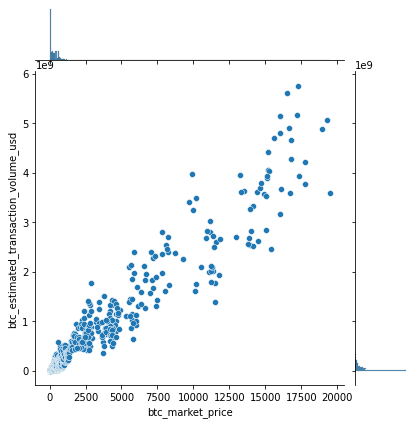

In [25]:
sns.jointplot(x=data.btc_market_price,y=data.btc_estimated_transaction_volume_usd,data=data)

##Preparing Data

In [26]:
data[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']].isnull().sum()

btc_market_cap                       0
btc_n_transactions                   0
btc_miners_revenue                   0
btc_cost_per_transaction             0
btc_difficulty                      16
btc_hash_rate                        0
btc_cost_per_transaction_percent     0
dtype: int64

In [27]:
data['btc_difficulty'].describe()

count    2.890000e+03
mean     1.606360e+11
std      3.725159e+11
min      2.527738e+00
25%      1.591075e+06
50%      2.193848e+09
75%      1.130000e+11
max      2.600000e+12
Name: btc_difficulty, dtype: float64

In [28]:
data = data.fillna(method='backfill')

In [29]:
data['btc_difficulty'].isnull().sum()

0

In [30]:
X=pd.DataFrame(data[['btc_market_cap','btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty','btc_hash_rate','btc_cost_per_transaction_percent']])
X.head()
Y=data['btc_market_price']

In [31]:
X.head()

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [42]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) 

In [43]:
Y_test.head()

582       5.83001
2001    265.85000
1259    101.89998
2129    453.39000
667       3.23000
Name: btc_market_price, dtype: float64

##Regression

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
Y_pred = regressor.predict(X_test)

##Metric

In [46]:
import sklearn
mse = sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(f'Mean Squared Error is : {mse}')

Mean Squared Error is : 445.38392125249896
